<a href="https://colab.research.google.com/github/purvikabajaj/Convolutional-Neural-Networks/blob/master/Cats_vs_Dogs_using_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2020-08-16 08:02:26--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.78.216.154, 2600:1417:76:1aa::e59, 2600:1417:76:1b4::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.78.216.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   177MB/s    in 4.6s    

2020-08-16 08:02:30 (172 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [2]:
import os
import zipfile

In [3]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
print(len(os.listdir('/tmp/PetImages/Cat')))
print(len(os.listdir('/tmp/PetImages/Dog')))

12501
12501


In [5]:
try:
  os.mkdir('/tmp/cats-vs-dogs')
  os.mkdir('/tmp/cats-vs-dogs/training')
  os.mkdir('/tmp/cats-vs-dogs/training/cats')
  os.mkdir('/tmp/cats-vs-dogs/training/dogs')
  os.mkdir('/tmp/cats-vs-dogs/testing')
  os.mkdir('/tmp/cats-vs-dogs/testing/cats')
  os.mkdir('/tmp/cats-vs-dogs/testing/dogs')
except OSError:
  pass

In [6]:
import random
import shutil
from shutil import copyfile

In [7]:
def split_data (SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  print('Split Size: ', SPLIT_SIZE)
  all_files = []

  for file_name in os.listdir(SOURCE):
    file_path = SOURCE + file_name

    if os.path.getsize(file_path):
      all_files.append(file_name)
    else:
      print('Zero Length so skipping'.format(file_name))

  n_files = len(all_files)
  split_point = int(n_files * SPLIT_SIZE)
  shuffled = random.sample(all_files, n_files)

  train_set = shuffled[:split_point]
  test_set = shuffled[split_point:]

  for file_name in train_set:
    copyfile(SOURCE + file_name, TRAINING + file_name)

  for file_name in test_set:
    copyfile(SOURCE + file_name, TESTING + file_name)


CAT_SOURCE_DIR = '/tmp/PetImages/Cat/'
TRAINING_CATS_DIR = '/tmp/cats-vs-dogs/training/cats/'
TESTING_CATS_DIR = '/tmp/cats-vs-dogs/testing/cats/'  
DOG_SOURCE_DIR = '/tmp/PetImages/Dog/'
TRAINING_DOGS_DIR = '/tmp/cats-vs-dogs/training/dogs/' 
TESTING_DOGS_DIR = '/tmp/cats-vs-dogs/testing/dogs/'

split_size = 0.9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

Split Size:  0.9
Zero Length so skipping
Split Size:  0.9
Zero Length so skipping


In [8]:
print(len(os.listdir('/tmp/cats-vs-dogs/training/cats')))
print(len(os.listdir('/tmp/cats-vs-dogs/training/dogs')))
print(len(os.listdir('/tmp/cats-vs-dogs/testing/cats')))
print(len(os.listdir('/tmp/cats-vs-dogs/testing/dogs')))

11250
11250
1250
1250


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/tmp/cats-vs-dogs/training',
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'binary'
)

Found 22499 images belonging to 2 classes.


In [11]:
import matplotlib.pyplot as plt

(150, 150, 3)


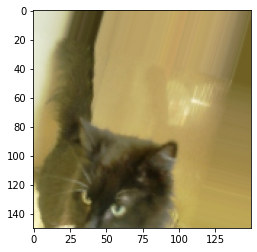

In [12]:
x,y = train_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [13]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/cats-vs-dogs/testing',
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'binary'
)

Found 2499 images belonging to 2 classes.


(150, 150, 3)


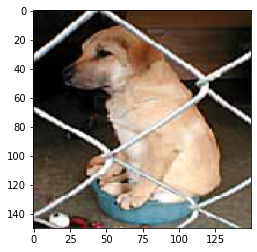

In [14]:
x,y = validation_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [16]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), input_shape=(150,150,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit_generator(
    train_generator,
    epochs = 15,
    verbose=1,
    validation_data = validation_generator
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
 711/2250 [========>.....................] - ETA: 2:19 - loss: 0.6917 - accuracy: 0.5233

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2250/2250 [==============================] - 213s 95ms/step - loss: 0.6875 - accuracy: 0.5434 - val_loss: 0.6802 - val_accuracy: 0.5766
Epoch 2/15
2250/2250 [==============================] - 212s 94ms/step - loss: 0.6778 - accuracy: 0.5762 - val_loss: 0.6730 - val_accuracy: 0.5846
Epoch 3/15
2250/2250 [==============================] - 213s 94ms/step - loss: 0.6696 - accuracy: 0.5907 - val_loss: 0.6601 - val_accuracy: 0.5978
Epoch 4/15
2250/2250 [==============================] - 211s 94ms/step - loss: 0.6379 - accuracy: 0.6353 - val_loss: 0.5945 - val_accuracy: 0.6723
Epoch 5/15
2250/2250 [==============================] - 212s 94ms/step - loss: 0.5865 - accuracy: 0.6866 - val_loss: 0.5710 - val_accuracy: 0.6927
Epoch 6/15
2250/2250 [==============================] - 212s 94ms/step - loss: 0.5502 - accuracy: 0.7211 - val_loss: 0.4795 - val_accuracy: 0.7839
Epoch 7/15
2250/2250 [==============================] - 210s 93ms/step - loss: 0.5197 - accuracy: 0.7433 - val_loss: 0.4683 - val

Text(0.5, 1.0, 'TRAINING AND VALIDATION LOSS')

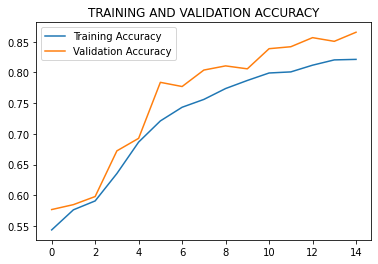

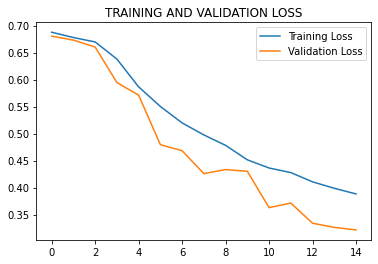

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('TRAINING AND VALIDATION ACCURACY')

plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('TRAINING AND VALIDATION LOSS')

In [22]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print('It is a dog')
  else: 
    print('It is a cat')

Saving maxresdefault.jpg to maxresdefault.jpg
[1.]
It is a dog
